df - contains Stocks Closing values & PCT
df_excess - contains daily return

In [1]:
%reset -f

In [2]:
import matplotlib.pyplot as plt
import random
from random import randint
import numpy as np
import pandas as pd
import statistics
import pandas_datareader as web
import seaborn as sns

Importing Data from Yahoo finance

In [3]:
stocks=['INDIGO.NS','JETAIRWAYS.NS','ICICIBANK.NS','SBIN.NS','TATACHEM.NS','TATACOMM.NS']
stocks_data=[]
stocks_returns=[]
for stock in range(len(stocks)):
  stock=web.DataReader(stocks[stock],start='01-01-2019',end='31-12-2019',data_source='yahoo')
  stocks_data.append(round(stock['Close'],2))

In [4]:
df_returns=pd.DataFrame()
for stock in stocks_data:
  each=[]
  for i in range(1,len(stock)):
    each.append((stock[i]-stock[i-1])/stock[i-1])
  stocks_returns.append(each)

In [5]:
df=pd.concat(stocks_data,axis=1)
df_returns=pd.DataFrame.transpose(pd.DataFrame(stocks_returns))
names=['Indigo','JetAirways','ICICI','SBI','TataChem','TataComm']
df.columns=names
df_returns.columns=names

Calculating Variances of each stock 

In [6]:
variances=[]
for stock in df:
  variances.append(statistics.variance(df[stock]))

Daily return percentages DataFrame

In [7]:
df_returns.head(5)

,Indigo,JetAirways,ICICI,SBI,TataChem,TataComm
0,-0.003946,-0.061432,0.002337,-0.019025,-0.006309,-0.001723
1,-0.003833,-0.062038,-0.003703,-0.009527,-0.009132,0.028100
2,-0.011543,-0.008091,0.005368,0.022501,0.005760,-0.008489
3,-0.025761,0.004078,0.006846,-0.004536,0.002076,-0.004892
4,-0.003098,-0.003452,0.033859,0.030375,-0.000143,-0.002364


df before appending pct

In [8]:
covMx=pd.DataFrame.cov(df_returns)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 243 entries, 2019-01-01 to 2020-01-01
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Indigo      243 non-null    float64
 1   JetAirways  243 non-null    float64
 2   ICICI       243 non-null    float64
 3   SBI         243 non-null    float64
 4   TataChem    243 non-null    float64
 5   TataComm    243 non-null    float64
dtypes: float64(6)
memory usage: 13.3 KB


In [9]:
PCT_Names=['Indigo_PCT','JetAirways_PCT','ICICI_PCT','SBI_PCT','TataChem_PCT','TataComm_PCT']
length=len(df.columns)
for i in range(length):
  pct=round(df.iloc[:,i].pct_change()*100,2)
  df.insert(2*i+1,names[i]+"_PCT",pct)

df after appending pct

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 243 entries, 2019-01-01 to 2020-01-01
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Indigo          243 non-null    float64
 1   Indigo_PCT      242 non-null    float64
 2   JetAirways      243 non-null    float64
 3   JetAirways_PCT  241 non-null    float64
 4   ICICI           243 non-null    float64
 5   ICICI_PCT       242 non-null    float64
 6   SBI             243 non-null    float64
 7   SBI_PCT         240 non-null    float64
 8   TataChem        243 non-null    float64
 9   TataChem_PCT    242 non-null    float64
 10  TataComm        243 non-null    float64
 11  TataComm_PCT    241 non-null    float64
dtypes: float64(12)
memory usage: 24.7 KB


Final df 

In [11]:
df.head(5)

,Indigo,Indigo_PCT,JetAirways,JetAirways_PCT,ICICI,ICICI_PCT,SBI,SBI_PCT,TataChem,TataChem_PCT,TataComm,TataComm_PCT
Date,,,,,,,,,,,,
2019-01-01,1165.60,NaN,280.80,NaN,363.75,NaN,299.60,NaN,705.30,NaN,522.25,NaN
2019-01-02,1161.00,-0.39,263.55,NaN,364.60,-6.14,293.90,NaN,700.85,0.23,521.35,NaN
2019-01-03,1156.55,-0.38,247.20,-2.56,363.25,-6.20,291.10,NaN,694.45,-0.37,536.00,0.98
2019-01-04,1143.20,-1.15,245.20,202.63,365.20,-0.81,297.65,-8015.23,698.45,0.54,531.45,-86.94
2019-01-07,1113.75,-2.58,246.20,124.35,367.70,0.41,296.30,-38.63,699.90,0.68,528.85,-150.62


Covariance Matrix of each stock with the other

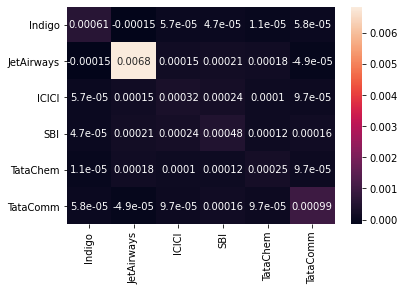

In [12]:
sns.heatmap(covMx,annot=True) 
plt.show()

Percentage Mean Returns DataFrame

In [13]:
mean_returns=[]
for name in names:
  mean_returns.append(df_returns[name].mean())
df_mean_returns=pd.DataFrame.transpose(pd.DataFrame(mean_returns))
df_mean_returns.columns=names

In [14]:
df_mean_returns

,Indigo,JetAirways,ICICI,SBI,TataChem,TataComm
0,0.000863,-0.006143,0.001766,0.00069,-0.00008,-0.000543


Assigning weights randomly (Example)

In [15]:
weights=[]
for i in range(len(names)):
  weights.append(round(random.uniform(0,1),4))
def sum1(k):
  a=0
  for i in range(len(k)):
    a+=k[i]
  return a
sum=sum1(weights)
for i in range(len(weights)):
  weights[i]=round(weights[i]/sum,4)
expected_returns=[]
for i in range(len(weights)):
  expected_returns.append(weights[i]*mean_returns[i])
print("Randomly assigned weights: ",end=" ")
print(weights)
print("Expected return by this randomly assigned weights for each stock: ",end=" ")
print(expected_returns)
print("Expected return by this randomly assigned weights for portfolio: ",end=" ")
print(round(sum1(expected_returns*100)*len(df),4),end="") #Since sum(expected_returns) gives return for one day for that portfolio, We want return per year
print("%")

Randomly assigned weights:  [0.0897, 0.0322, 0.3416, 0.0576, 0.1545, 0.3244]
Expected return by this randomly assigned weights for each stock:  [7.737356229119771e-05, -0.00019780654550055168, 0.0006034227342305045, 3.975969438768873e-05, -1.2360757981218342e-05, -0.0001759994156167206]
Expected return by this randomly assigned weights for portfolio:  8.1257%


Function for
* Generating random portfolios 
* Compute returns(per year) for those portfolios

In [16]:
def random_portfolio():
  weights=[]
  for i in range(len(names)):
    weights.append(round(random.uniform(0,1),4))
  def sum1(k):
    a=0
    for i in range(len(k)):
      a+=k[i]
    return a
  sum=sum1(weights)
  for i in range(len(weights)):
    weights[i]=round(weights[i]/sum,4)
  expected_returns=[]
  for i in range(len(weights)):
    expected_returns.append(weights[i]*mean_returns[i])
  returns=sum1(expected_returns*100)*len(df)
  return weights,returns

Function for 
* Calculating variance of a portfolio with weights given

In [17]:
cov=pd.DataFrame.to_numpy(covMx)
"""def portfolio_variance(weights):
  sum=0
  for i in range(len(variances)):
    sum+=weights[i]*weights[i]*variances[i]
  weighted_avg=1
  s=0
  weight_sum=0
  print(sum)
  for i in range(1,len(weights)):
    s+=weights[i]*weights[i-1]*cov[i][i-1]
    weight_sum+=weights[i]*weights[i-1]
  s=s/weight_sum
  weighted_avg=s
  return sum+2*weighted_avg"""
def portfolio_variance(weights):
  return np.dot(np.array(weights).T,np.dot(cov,weights))

In [18]:
iters=1000
Returns=[]
Volatility=[]
for i in range(iters):
  weights,returns=random_portfolio()
  var=portfolio_variance(weights)
  Returns.append(returns)
  Volatility.append(var)
frame=pd.DataFrame({"Returns":Returns,"Volatility":Volatility})

In [19]:
frame.head(5)

,Returns,Volatility
0,-19.068447,0.000392
1,3.623791,0.000222
2,-9.079136,0.000298
3,-1.013924,0.000226
4,13.397619,0.000163


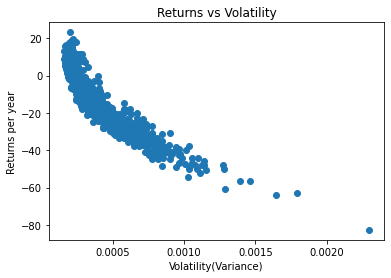

In [20]:
plt.scatter(frame['Volatility'],frame['Returns'])
plt.title("Returns vs Volatility")
plt.xlabel("Volatility(Variance)")
plt.ylabel("Returns per year")
plt.show()

Calculating Sharpe and appending in the frame dataframe

In [21]:
sharpe=[]
for i in range(len(frame)):
  ret=frame.iloc[i,0]
  vol=frame.iloc[i,1]
  sharpe.append((ret-4)/np.sqrt(vol))   #Assuming 4% is risk free return rate
frame['Sharpe']=sharpe

In [22]:
frame.head(5)

,Returns,Volatility,Sharpe
0,-19.068447,0.000392,-1164.390540
1,3.623791,0.000222,-25.246637
2,-9.079136,0.000298,-758.108171
3,-1.013924,0.000226,-333.398590
4,13.397619,0.000163,737.042672


Finding the best portfolio

In [23]:
ind=frame[frame['Sharpe']==frame['Sharpe'].max()].index.values #Finding the index of the portfolio with max Sharpe ratio
frame.iloc[ind,:]

,Returns,Volatility,Sharpe
345,23.241635,0.000199,1362.627645


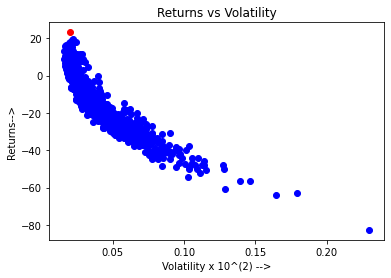

In [24]:
col=[]
for i in range(len(frame)):
  if(i==ind): col.append('red')
  else: col.append('b')
for i in range(len(frame)):
  plt.scatter(frame.iloc[i,1]*100,frame.iloc[i,0],c=col[i])
plt.xlabel("Volatility x 10^(2) -->")
plt.ylabel("Returns-->")
plt.title("Returns vs Volatility")
plt.show()

In [25]:
sim_returns=[]
for i in range(1000):
  sim_returns.append(np.random.normal(frame['Returns'].iloc[ind]/240,np.sqrt(frame['Volatility'].iloc[ind]/240),5000))
print("VAR 95 = ",end="")
print(np.percentile(sim_returns,95))
print("VAR 99 = ",end="")
print(np.percentile(sim_returns,99))

VAR 95 = 0.09833932453689416
VAR 99 = 0.0989618472014522
